In [2]:
#Librerías necesarias para la exploración
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import  OrdinalEncoder

In [3]:
df = pd.read_csv('../data/coffe_df.csv')
df.head(2)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [5]:
#Copiamos el dataframe para poder retirar ciertas variables que aportan ruido como , identificadores y nombre
df_cop = df.copy()

variables = ['Unnamed: 0', 'ID', 'ICO Number', 'Farm Name', 'Lot Number', 'Mill', 'Company', 'Producer', 'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date', 'Owner', 'Status', 'Expiration', 'Certification Body', 'Certification Address', 'Certification Contact']

df_cop = df.drop(variables, axis=1)
df_cop.head(2)

,Country of Origin,Altitude,Region,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,Colombia,1700-1930,"Piendamo,Cauca",Castillo,Double Anaerobic Washed,8.58,8.5,8.42,8.58,8.25,...,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3
1,Taiwan,1200,Chiayi,Gesha,Washed / Wet,8.50,8.5,7.92,8.00,7.92,...,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0


### La razón de eliminación de estas variables se debe a que la gran mayoria representan algunos identificadores o certificados para la produccion de estos mismos , también nombres que no afectandirectamente la calidad del café o unas están demasiado relacionadas como el molino el cual es el nombre de la misma granja donde fue cultivado.

### Objetivo: Clasificar la calidad del café basandonos en el Total Cup Points , con clases Bajo, Medio, Alto, Utilizando el resto de las variables para esto 

In [6]:
#Columnas con las que nos quedamos que estaremos utilizando
df_cop.columns

Index(['Country of Origin', 'Altitude', 'Region', 'Variety',
       'Processing Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects'],
      dtype='object')

In [7]:
#Confirmar tipos de datos
df_cop.dtypes

Country of Origin        object
Altitude                 object
Region                   object
Variety                  object
Processing Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean Cup               float64
Sweetness               float64
Overall                 float64
Defects                 float64
Total Cup Points        float64
Moisture Percentage     float64
Category One Defects      int64
Quakers                   int64
Color                    object
Category Two Defects      int64
dtype: object

In [8]:
#reviso el tamaño del dataframe
df.shape

(207, 41)

Top de los países con mejor puntaje en general basandose en puntaje de dulzura, limpieza, balance, entre otros

In [9]:
df_cop[df_cop['Total Cup Points'] >= 87]['Country of Origin']

0      Colombia
1        Taiwan
2          Laos
3    Costa Rica
4      Colombia
5     Guatemala
Name: Country of Origin, dtype: object

In [10]:
#Estadisticos generales ed los datos 
df_cop.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


In [11]:
#Revision de valores nulos
df_cop.isnull().sum()

Country of Origin       0
Altitude                1
Region                  2
Variety                 6
Processing Method       5
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
dtype: int64

In [12]:
#Tenemos presencia de pocos valores nulos por lo que optaremos por un dropna que retira esos valores nulos
df_cop = df_cop.dropna()
df_cop.isnull().sum()

Country of Origin       0
Altitude                0
Region                  0
Variety                 0
Processing Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
dtype: int64

In [13]:
#revision de datos duplicados
df_cop[df_cop.duplicated()]

,Country of Origin,Altitude,Region,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects


In [14]:
#Realizamos la transformacion de los puntajes para determinar Clases dependiendo los puntos totales
def categorize_points(points):
    if points <= 84:
        return 'Medio - Alto'
    else:
        return 'Alto'

df_cop['Quality'] = df_cop['Total Cup Points'].apply(categorize_points)
df_cop['Quality'].head(5)

0    Alto
1    Alto
2    Alto
3    Alto
4    Alto
Name: Quality, dtype: object

### Conclusiones de la primera parte: Es un dataset inicial bastante grande el cual se realizó una busqueda para poder seleccionar las variables mas influyentes en la seleccion de puntos , esto nos va ayudar para determinar de que calidad es el café

In [15]:
#Relizo la separación de variables para entrenar y para clsificar 
X = df_cop.drop(['Total Cup Points', 'Quality'], axis=1)
y = df_cop['Quality']

#Variables categroicas que se necesitan convertir a numericas
vars_categoricas = X.select_dtypes(include='object').columns.to_list()

In [16]:
#Realizamos la separacion 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Convertimos las variables
enconder_x = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[vars_categoricas] = enconder_x.fit_transform(X_train[vars_categoricas])
X_test[vars_categoricas] = enconder_x.transform(X_test[vars_categoricas])

Y_train = Y_train.map({'Medio - Alto': 0, 'Alto': 1})
Y_test = Y_test.map({'Medio - Alto': 0, 'Alto': 1})

In [121]:
#Busqueda de parametros con gridsearch 

dt = DecisionTreeClassifier(random_state=42)

#especificamos los parametros fijo por los cuales va combinar e iterar probando para mejores resultados
parameters_dt = {
    'max_depth': [2, 4, 6, 8], #Profundidad maxima
    'min_samples_leaf': [2, 5, 10], #Cantidad de nodos finales en el arbol
    'min_samples_split': [1, 2, 4], #Cantidad minima de separaciones en el arbol
    'max_features': ['sqrt', 'log2'], #Como se van a utilizar los datos (Separar los datos que va usar el modelo)
    'criterion': ['entropy', 'gini'] #Como medimos calidad del modelo
}

#Lo vamos a utlizar priorizando metrica f1
search_grid = GridSearchCV(
    estimator=dt,
    param_grid=parameters_dt,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1,
    refit=True
)

search_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/base.py", line 471, 

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [2, 4, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [2, 5, ...], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [127]:
#El modelo nos da la oportunidad de reentrenar el modelo con los mejores parametros pero antes de eso es mejor revisar cuales fueron
print('mejores parametros',search_grid.best_params_) 
print('mejor f1', search_grid.best_score_)

mejores parametros {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}
mejor f1 0.947050238575677


In [17]:
# Reajustar el modelo y sacar metricas necesarias

dt = DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=5, min_samples_split=2)
dt.fit(X_train, Y_train)

pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

print(f'Accuracy train {accuracy_score(Y_train, pred_train)}')
print(f'Accuracy Test {accuracy_score(Y_test, pred_test)}')

print(f'Reporte general \n {classification_report(Y_test, pred_test)}')

Accuracy train 0.9423076923076923
Accuracy Test 0.8
Reporte general 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.74      0.82      0.78        17

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



### Si bien son pocos datos tiene una buena precision entre estos, son buenas metricas y tambien podemos evidenciar que no hay un overtfitting que es un gran problema en este tipo de modelos

In [18]:
#Revisar mejores fatures para el modelo para optimizarlo mas
importances = dt.feature_importances_
features = X.columns 

results = pd.DataFrame({'Features': features, 'Importances': importances}).sort_values(by='Importances', ascending=False)

/tmp/ipykernel_25466/3653026787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Importances', y='Features', palette='bright')


<Axes: xlabel='Importances', ylabel='Features'>

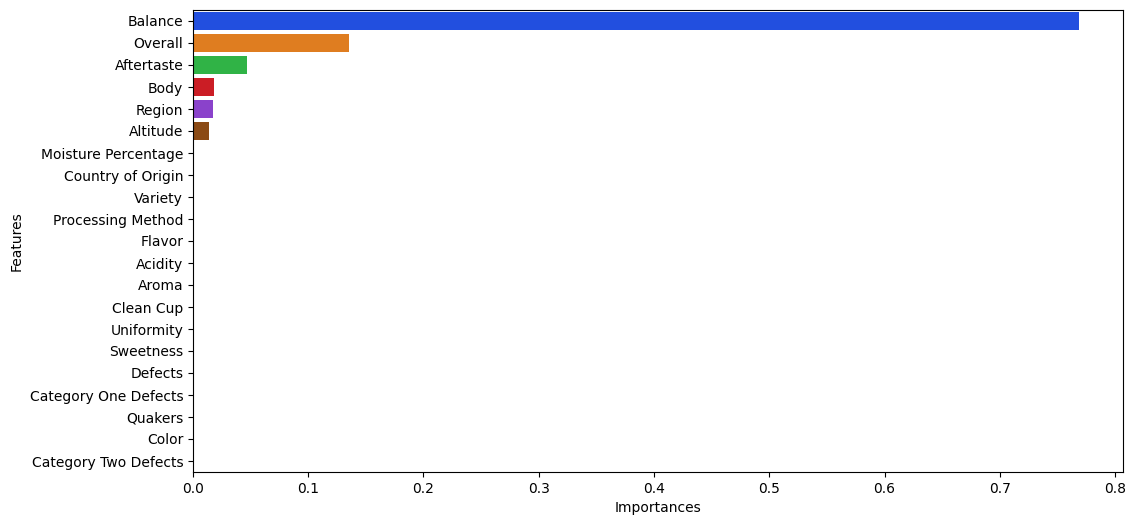

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x='Importances', y='Features', palette='bright')

### En esta parte podemos identificar las variables que mas influyen en la decision del modelo, entonces procedemos a usar aesas variables 

In [20]:
variables_new = ['Aftertaste', 'Overall', 'Body', 'Aroma', 'Flavor', 'Moisture Percentage']

In [21]:
X_train_new = X_train[variables_new]
X_test_new = X_test[variables_new]

In [22]:
# Reajustar el modelo y sacar metricas necesarias

dt = DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=5, min_samples_split=2)
dt.fit(X_train_new, Y_train)

pred_train = dt.predict(X_train_new)
pred_test = dt.predict(X_test_new)

print(f'Accuracy train {accuracy_score(Y_train, pred_train)}')
print(f'Accuracy Test {accuracy_score(Y_test, pred_test)}')

print(f'Reporte general \n {classification_report(Y_test, pred_test)}')

Accuracy train 0.9551282051282052
Accuracy Test 0.9
Reporte general 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.88      0.88      0.88        17

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



### Conclusiones , tenemos un set de datos pequeño, lo cual para manejos de hyperparametros que es el objetivo para buscar los mejores , funciona sin embargo al tener pocos datos las generalizaciones pueden verse algo afectadas, también podemos ver algunos países que tiene los puntajes maximos, y de estos datos podemos darnos cuneta uqe realmente la mayoria tiene puntajes altos entre 78 a 89 , siendo colombia el que mejor puntaje tiene en este, también vemos que el modelo no está muy lejos del accuracy de entrenamiento lo cual es buen indicio de no overfitting , se hciieron los procedimientos necesarios para tener el modelo en una manera estable con buenas metricas , recomendaciones hata el punto , utilizar mas datos , tambien vemos como al disminuir variables las precisiones de algunas clases van bajando lo cual tiene sentido ya que estos modelos funcionan con artas variables sin embargo para la clasificacion de Café de este set de datos por default viene con muchas variables muchas que aportan misma informacion, lo dejaremos con las nuevas variables para que sea mucho mas facil para el cliente poder colocar ciertas caracteristicas para determinar la calidad del café sin poner tantos features, en la proxima parte se hará el piline y la interactividad de este

In [26]:
variables_new.append('Quality')
variables_new

['Aftertaste',
 'Overall',
 'Body',
 'Aroma',
 'Flavor',
 'Moisture Percentage',
 'Quality']

In [28]:
df_cop = df_cop[variables_new]
df_cop

,Aftertaste,Overall,Body,Aroma,Flavor,Moisture Percentage,Quality
0,8.42,8.58,8.25,8.58,8.50,11.8,Alto
1,7.92,8.50,7.92,8.50,8.50,10.5,Alto
2,8.08,8.33,7.92,8.33,8.42,10.4,Alto
3,8.17,8.25,8.17,8.08,8.17,11.8,Alto
4,8.08,8.25,7.92,8.33,8.33,11.6,Alto
...,...,...,...,...,...,...,...
202,6.92,7.08,7.42,7.17,7.17,11.4,Medio - Alto
203,6.75,7.08,7.42,7.33,7.08,10.4,Medio - Alto
204,7.08,7.00,7.08,7.25,7.17,11.6,Medio - Alto
205,6.75,6.83,7.08,6.50,6.75,11.0,Medio - Alto


In [29]:
df_cop.to_csv('../data/df_ready.csv', index=False)